GTATGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATTACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATAACAATTGAATGTCTGCACAGCCACTTTCCACACAGACATCATAACAAAAAATTTCCACCAAACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAAACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAATCTCATCAATACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATACCCCGAACCAACCAAACCCCAAAGACACCCCCCACAGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAGACGGGCTCACATCACCCCATAAACAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTGAGTTCACCCTCTAAATCACCACGATCAAAAGGAACAAGCATCAAGCACGCAGCAATGCAGCTCAAAACGCTTAGCCTAGCCACACCCCCACGGGAAACAGCAGTGATTAACCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAAC

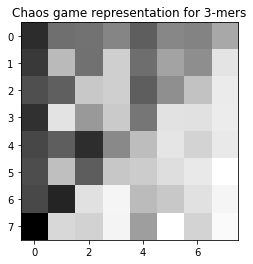

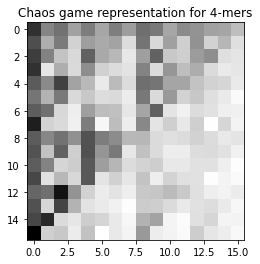

In [20]:
import collections
from matplotlib import pyplot as plt
from matplotlib import cm
import math
 
f = open("NC_012920.fasta")
s1 = f.read()
data = "".join(s1.split("\n")[1:])
print(data)
 
def count_kmers(sequence, k):
    d = collections.defaultdict(int)
    for i in range(len(data)-(k-1)):
        kmer = sequence[i:i+k]
        if "N" in kmer:
            continue
        d[kmer] +=1
    return d
 
def probabilities(kmer_count, k):
    probabilities = collections.defaultdict(float)
    N = len(data)
    for key, value in kmer_count.items():
        probabilities[key] = float(value) / (N - k + 1)
    return probabilities
 
def chaos_game_representation(probabilities, k):
    array_size = int(math.sqrt(4**k))
    chaos = [[0 for x in range(array_size)] for y in range(array_size)]
    for key, value in probabilities.items():
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
        for char in key:
            if char == "T":
                posx += maxx // 2
            elif char == "C":
                posy += maxy // 2
            elif char == "G":
                posx += maxx // 2
                posy += maxy // 2
            maxx = maxx // 2
            maxy = maxy // 2
        chaos[posy-1][posx-1] = value
    return chaos
 
f3 = count_kmers(data, 3)
f4 = count_kmers(data, 4)
print("k-mers of length 3",f3)
print(" ")
print("k-mers of length 4",f4)
 
f3_prob = probabilities(f3, 3)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 3)
plt.title('Chaos game representation for 3-mers')
plt.imshow(chaos_k3, interpolation='nearest', cmap=cm.gray_r)
plt.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
plt.title('Chaos game representation for 4-mers')
plt.imshow(chaos_k4, interpolation='nearest', cmap=cm.gray_r)
plt.show()
